# Predictive Analytics for Coronavirus Spread Using Bayesian Inference


In [1]:
from covid19_funcs import *
%matplotlib inline

#### Set up options

In [2]:
# File name of historical data file
data_filename='data/train.csv'

# Name of fields in the hystorical data frame for in the following order: 
# date, region, confirmed cases, fatalities
field_names=['Date','Country_Region','ConfirmedCases','Fatalities']

# List of regions for prediction
region_list=['Netherlands','US','Italy','Spain','Germany','France','Portugal','United Kingdom','Sweden']

# Number of days for prediction
n_days_predict=25

#### Load data

In [3]:
df=pd.read_csv(data_filename)[field_names]
df.columns=['date',region_field,cases_field,fatalities_field]
df.head()

,date,region,cases,deaths
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0


#### Compile model

In [4]:
# This function should be launched only once for new model
compile_model(model_logistic, model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d985c43dd0d3315f006d6331e82d0578 NOW.


Done


#### Get prediction for one region

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Time Series size: 173
Model parameters: alpha=0.833 (sd:0.002), beta=1.452(sd:0.031),    t0=2.595(sd:0.016)


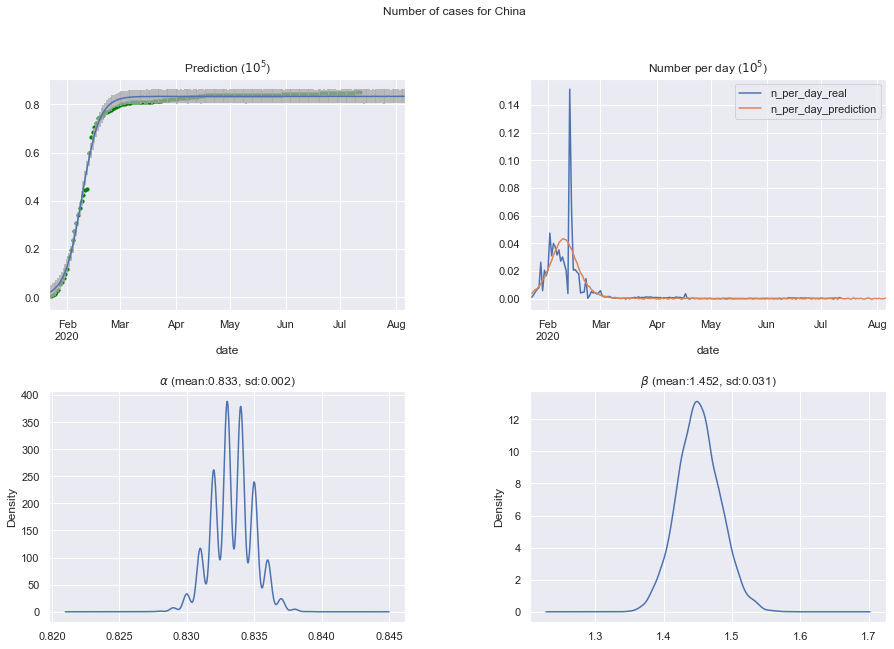

In [5]:
df_res=get_prediction(df,n_days_predict=25, target_field='cases', region_value='China', img_file_name='p1.png')

#### Get prediction for list of regions


Number of cases for regions:

Netherlands:
Time Series size: 173
Model parameters: alpha=0.485 (sd:0.002), beta=0.633(sd:0.015),    t0=11.603(sd:0.043)


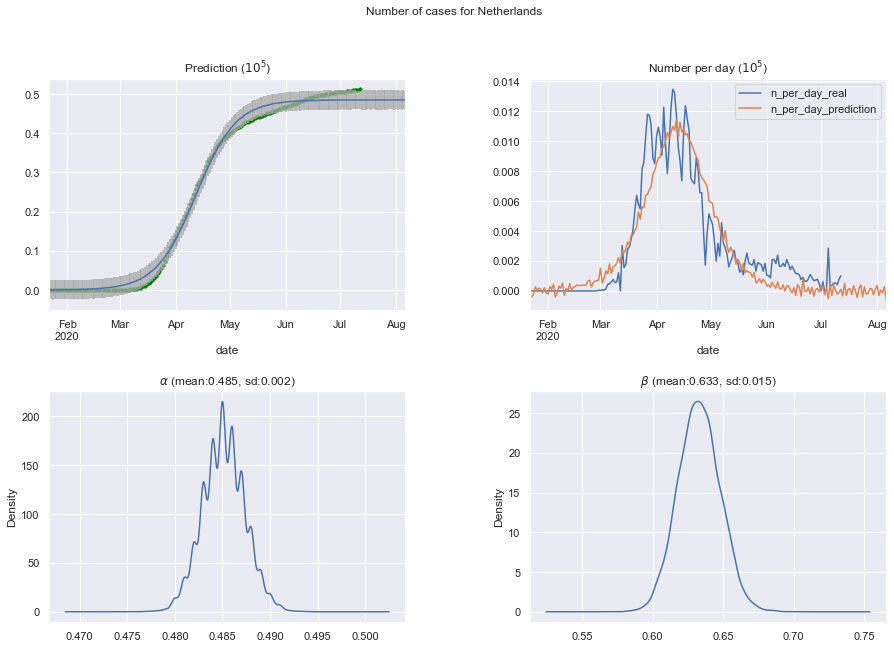


US:
Time Series size: 173
Model parameters: alpha=18.348 (sd:1.274), beta=0.628(sd:0.108),    t0=13.397(sd:0.423)


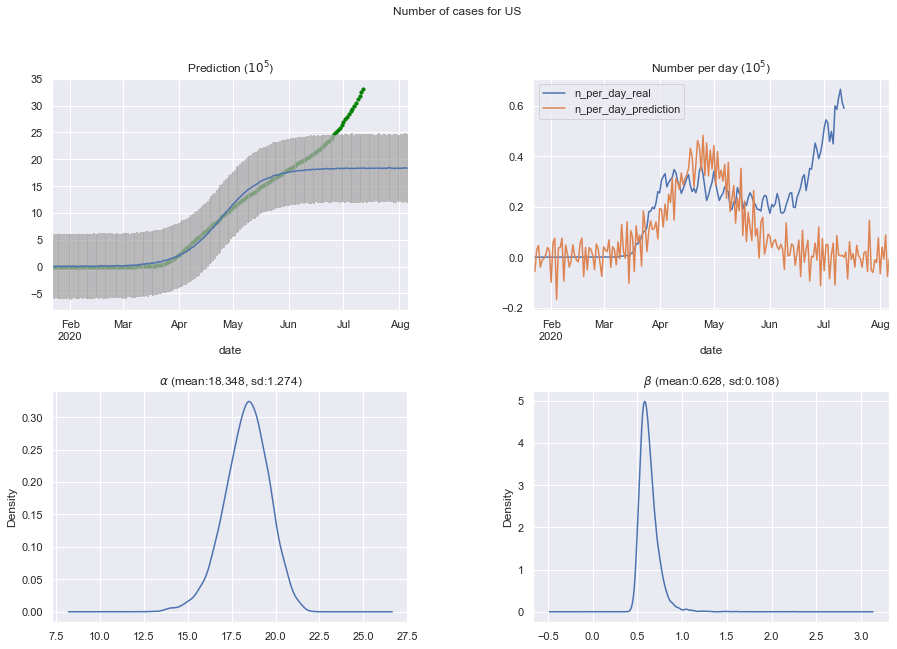


Italy:
Time Series size: 173
Model parameters: alpha=2.353 (sd:0.008), beta=0.609(sd:0.011),    t0=10.497(sd:0.037)


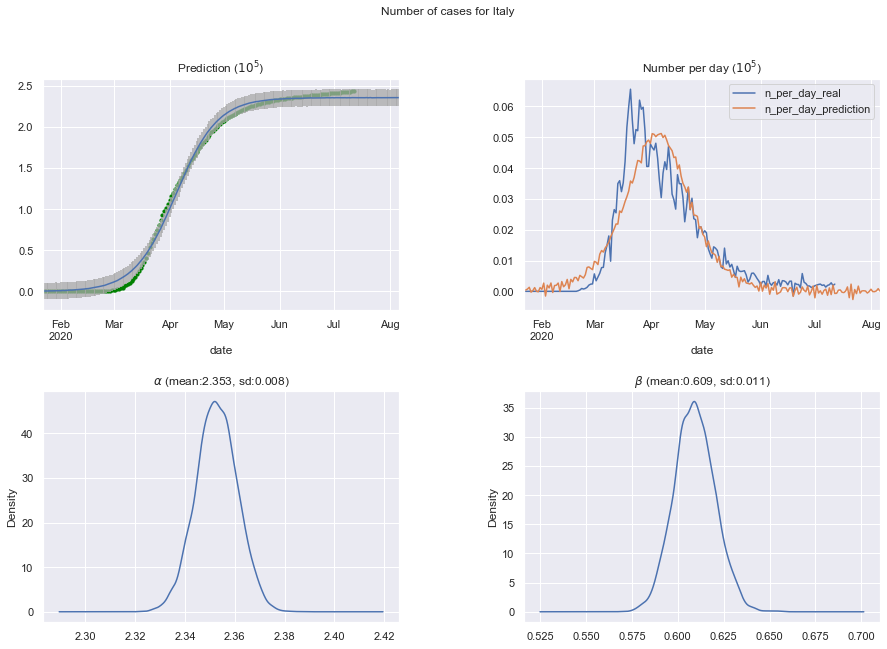


Spain:
Time Series size: 173
Model parameters: alpha=2.4 (sd:0.01), beta=0.8(sd:0.021),    t0=10.58(sd:0.038)


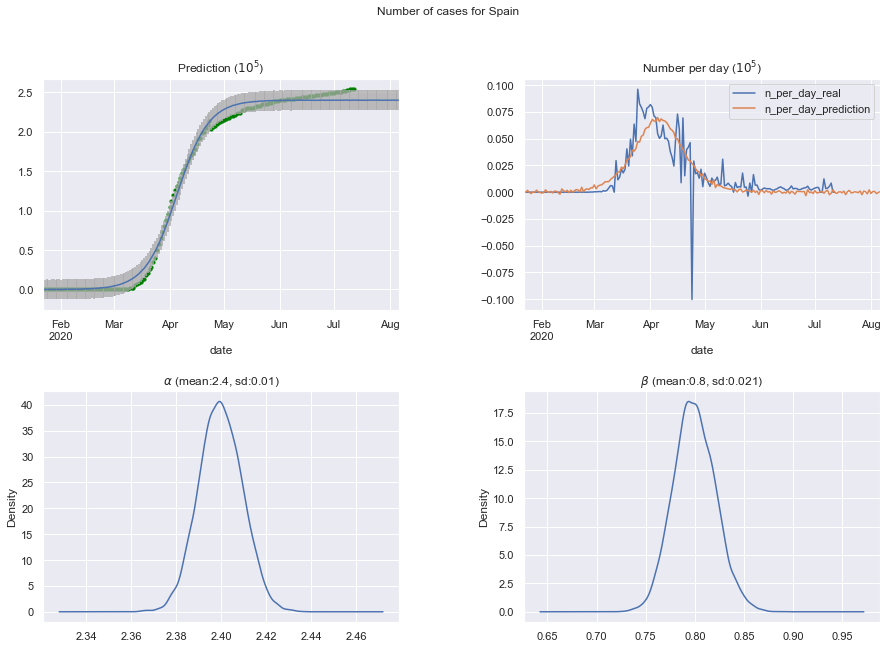


Germany:
Time Series size: 173
Model parameters: alpha=1.86 (sd:0.009), beta=0.729(sd:0.022),    t0=10.685(sd:0.047)


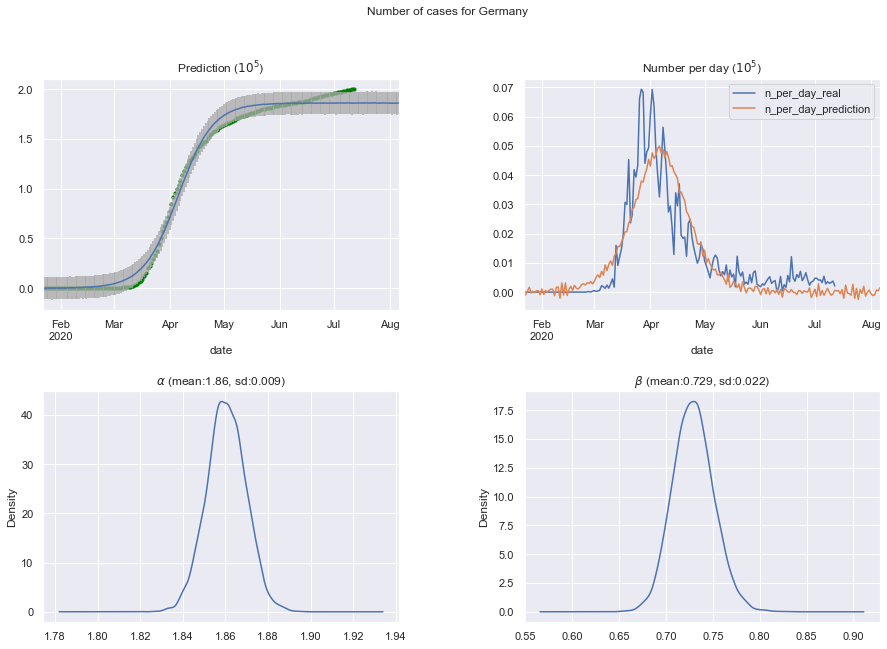


France:
Time Series size: 173
Model parameters: alpha=1.924 (sd:0.009), beta=0.793(sd:0.023),    t0=11.207(sd:0.041)


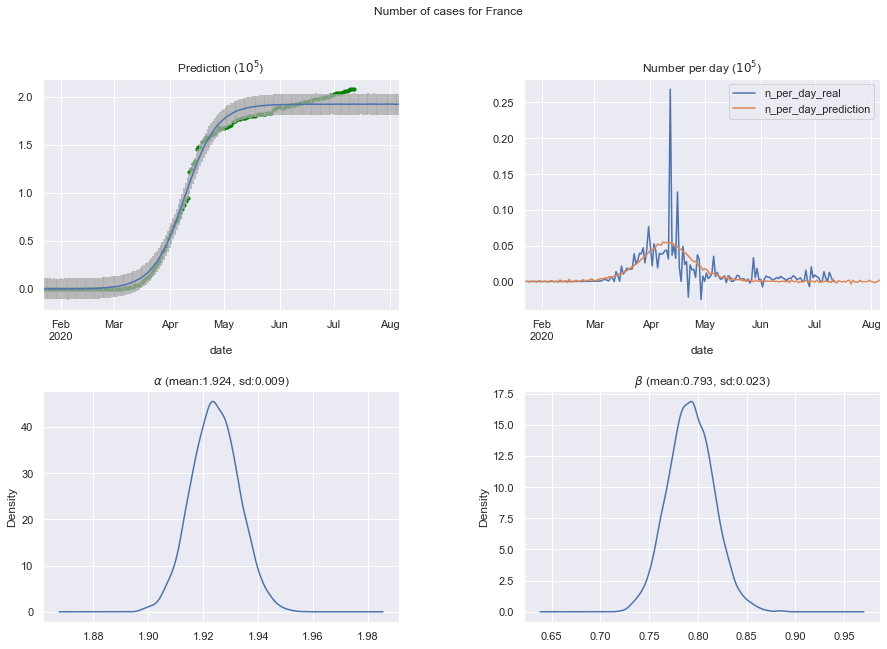


Portugal:
Time Series size: 173
Model parameters: alpha=0.415 (sd:0.007), beta=0.37(sd:0.016),    t0=13.651(sd:0.178)


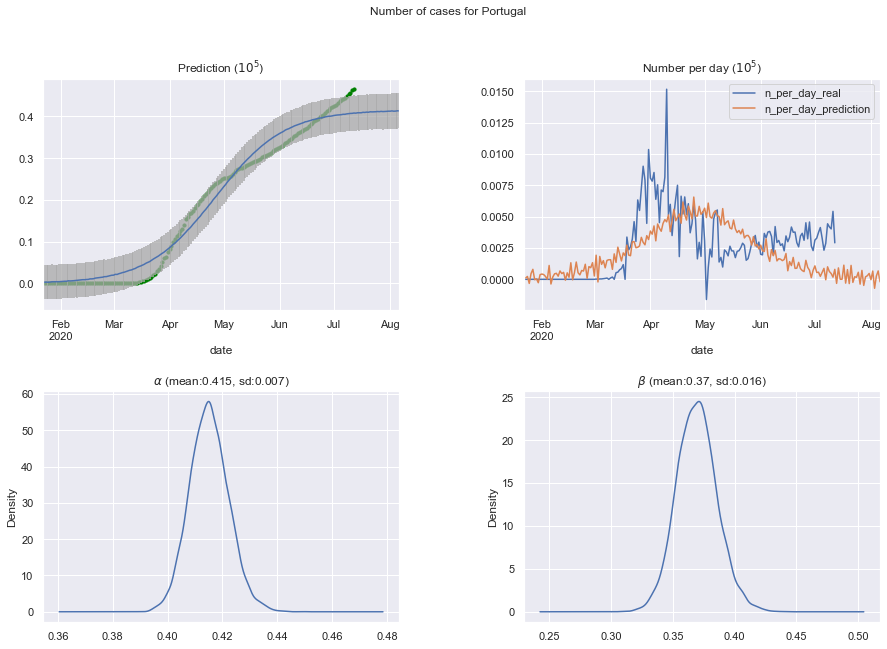


United Kingdom:
Time Series size: 173
Model parameters: alpha=2.806 (sd:0.012), beta=0.515(sd:0.009),    t0=13.159(sd:0.041)


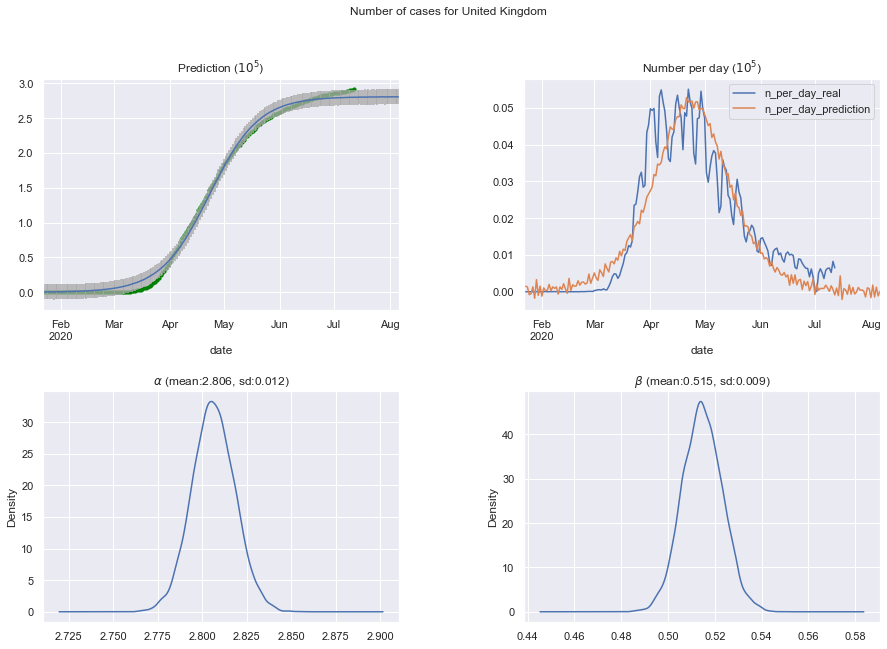


Sweden:
Time Series size: 173
Model parameters: alpha=0.992 (sd:0.027), beta=0.26(sd:0.006),    t0=20.034(sd:0.244)


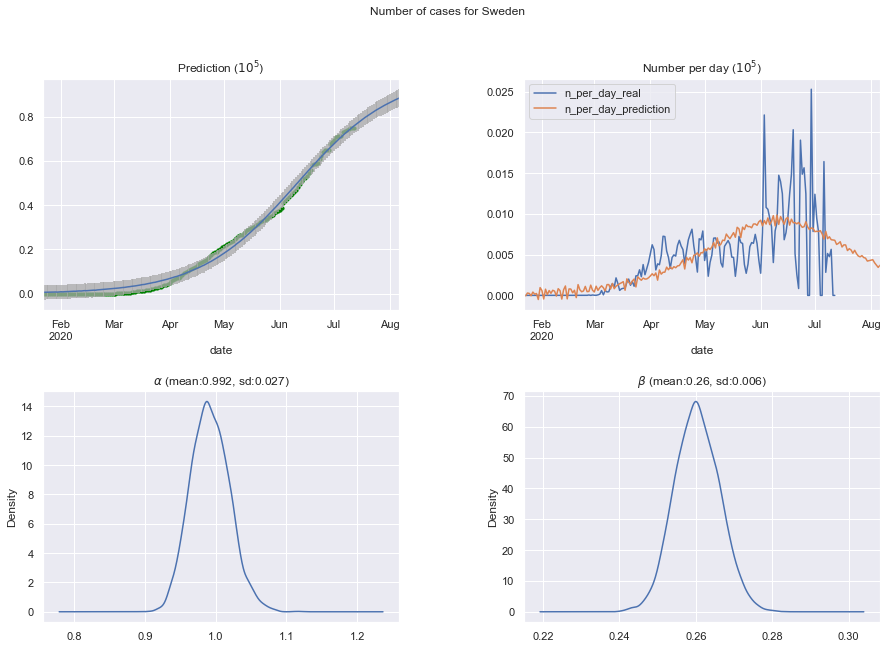

In [6]:
print ('\nNumber of cases for regions:')
get_regions_prediction(df,region_list,target_field='cases')


Number of cases for regions:

Netherlands:
Time Series size: 173
Model parameters: alpha=0.06 (sd:0.0), beta=0.709(sd:0.011),    t0=12.003(sd:0.027)


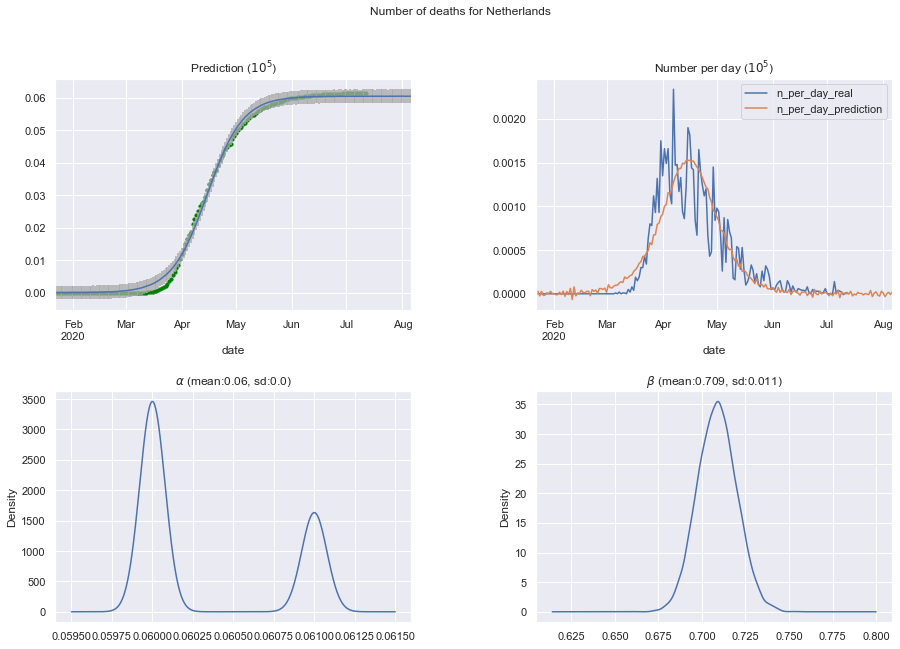


US:
Time Series size: 173
Model parameters: alpha=1.263 (sd:0.01), beta=0.473(sd:0.012),    t0=14.434(sd:0.071)


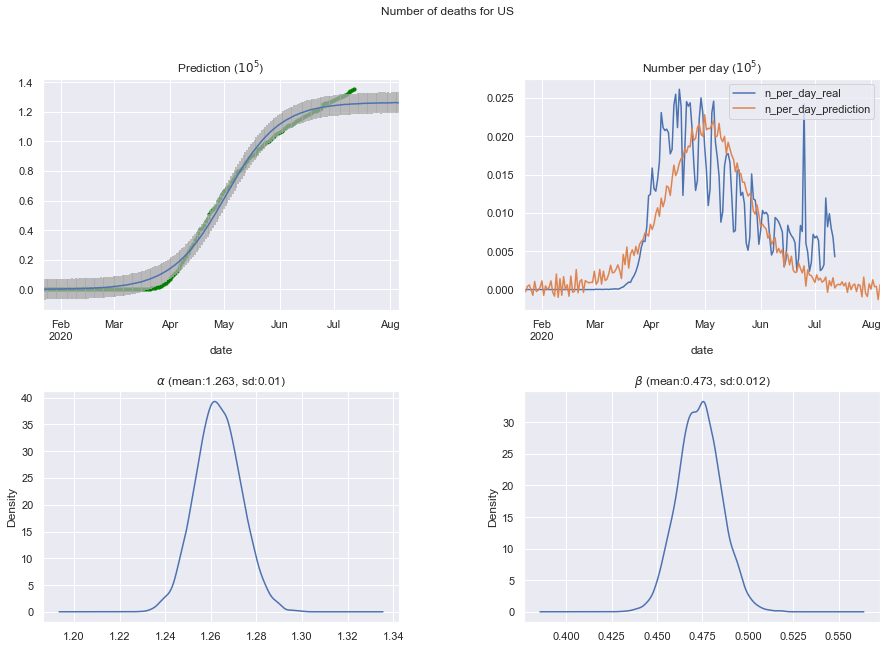


Italy:
Time Series size: 173
Model parameters: alpha=0.34 (sd:0.001), beta=0.591(sd:0.012),    t0=11.138(sd:0.041)


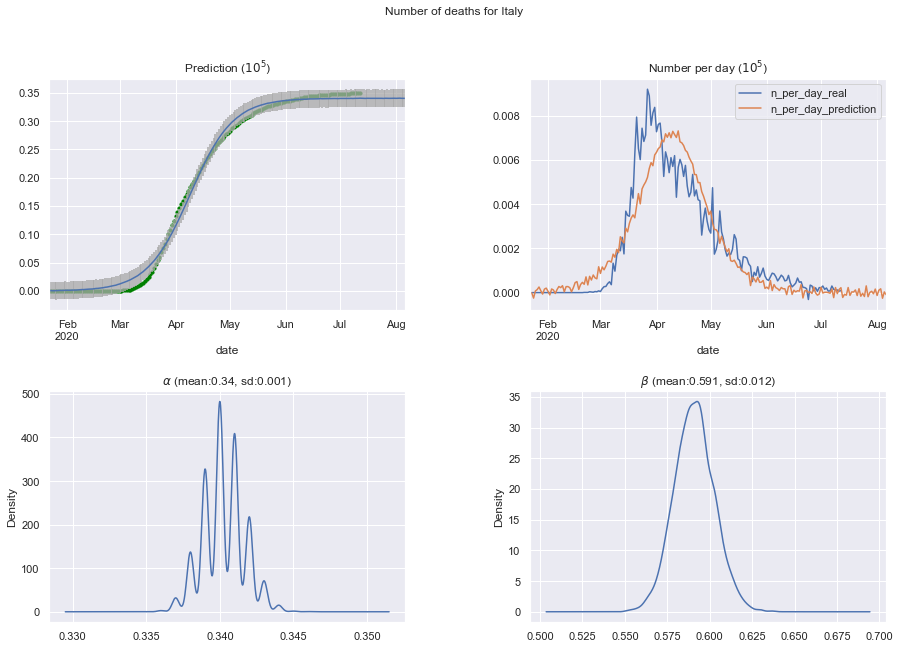


Spain:
Time Series size: 173
Model parameters: alpha=0.276 (sd:0.001), beta=0.792(sd:0.017),    t0=11.058(sd:0.032)


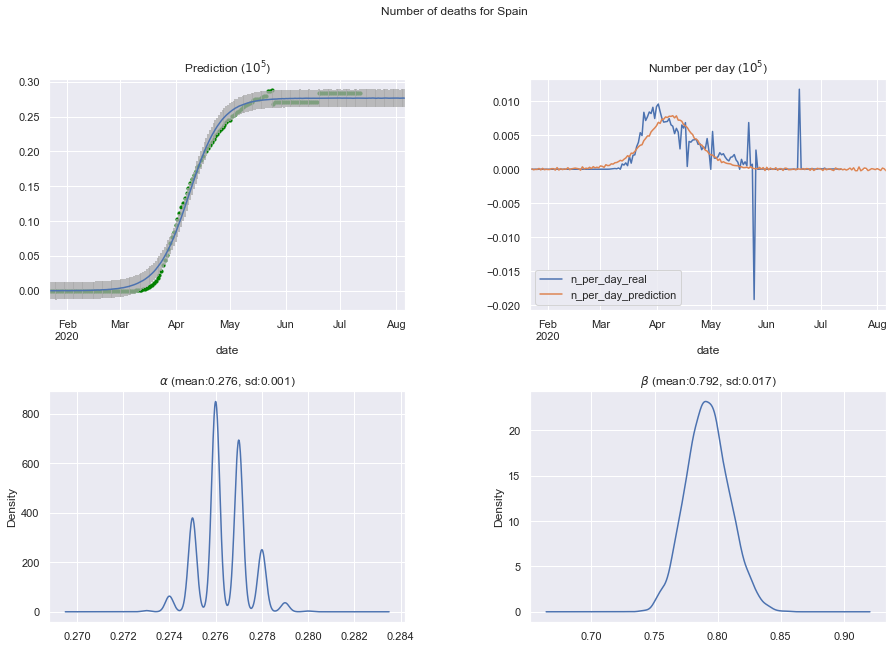


Germany:
Time Series size: 173
Model parameters: alpha=0.088 (sd:0.0), beta=0.718(sd:0.013),    t0=12.574(sd:0.03)


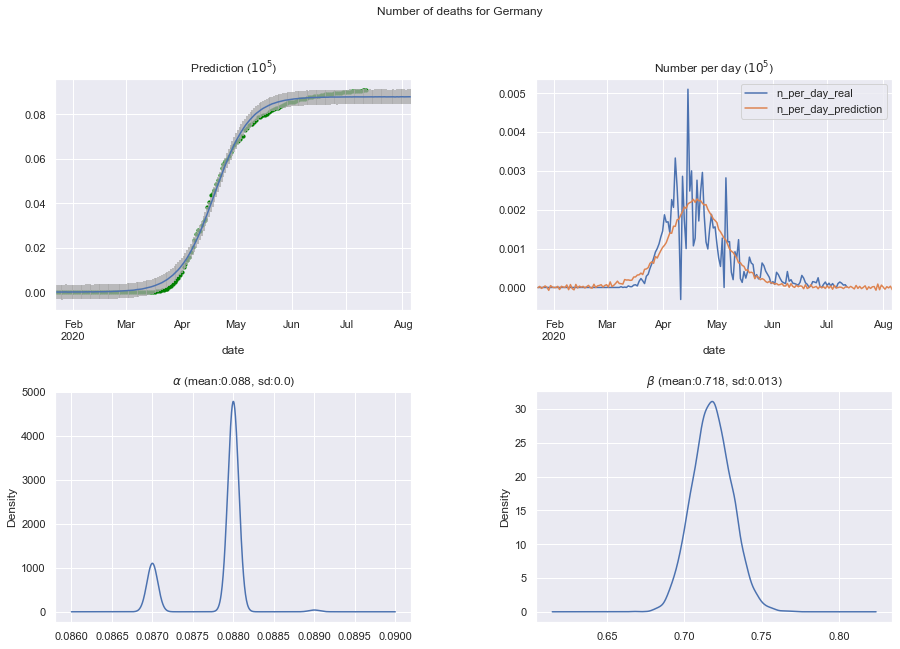


France:
Time Series size: 173
Model parameters: alpha=0.291 (sd:0.001), beta=0.817(sd:0.018),    t0=11.786(sd:0.031)


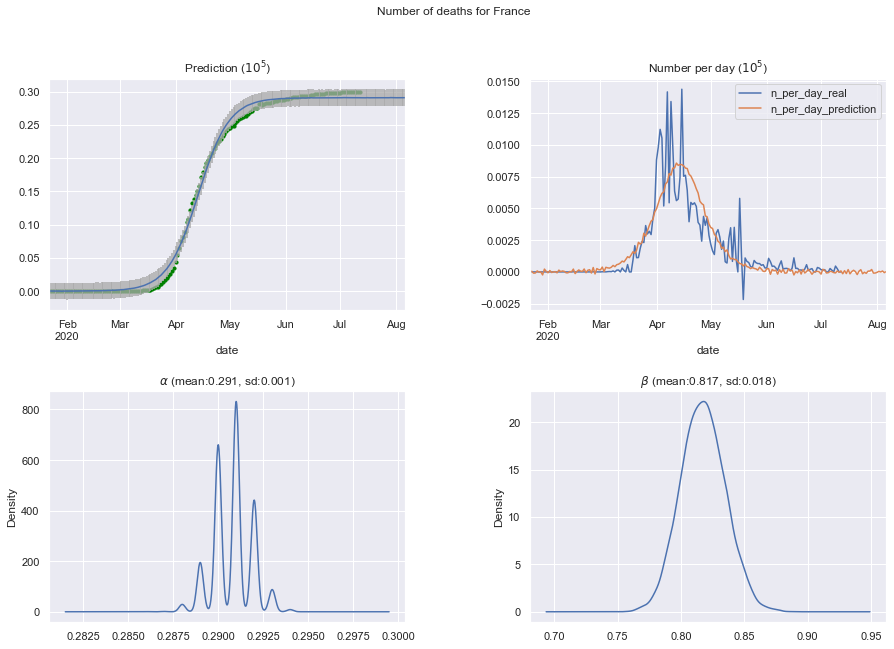


Portugal:
Time Series size: 173
Model parameters: alpha=0.016 (sd:0.0), beta=0.513(sd:0.013),    t0=13.313(sd:0.064)


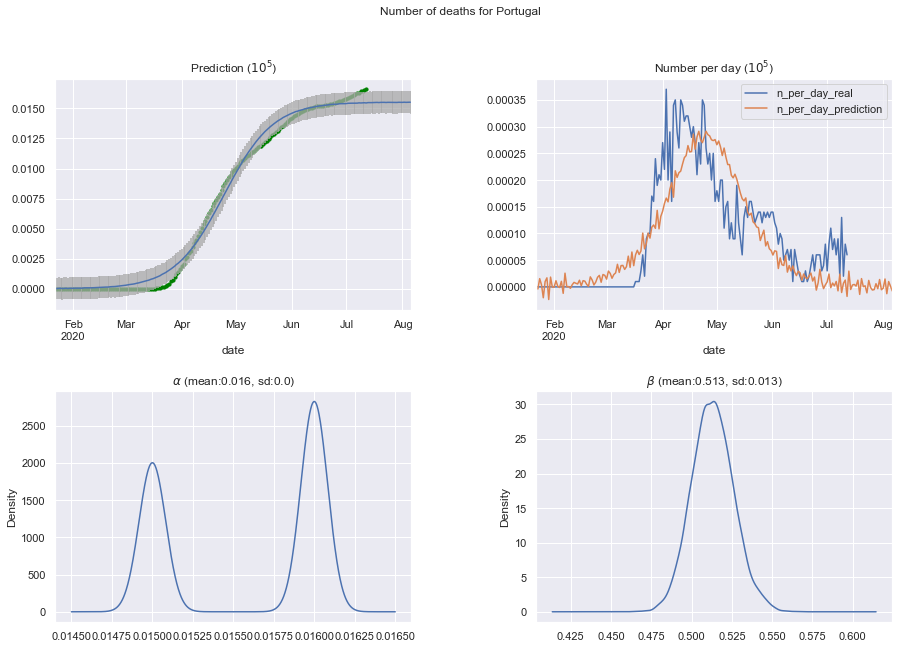


United Kingdom:
Time Series size: 173
Model parameters: alpha=0.427 (sd:0.003), beta=0.561(sd:0.014),    t0=13.408(sd:0.055)


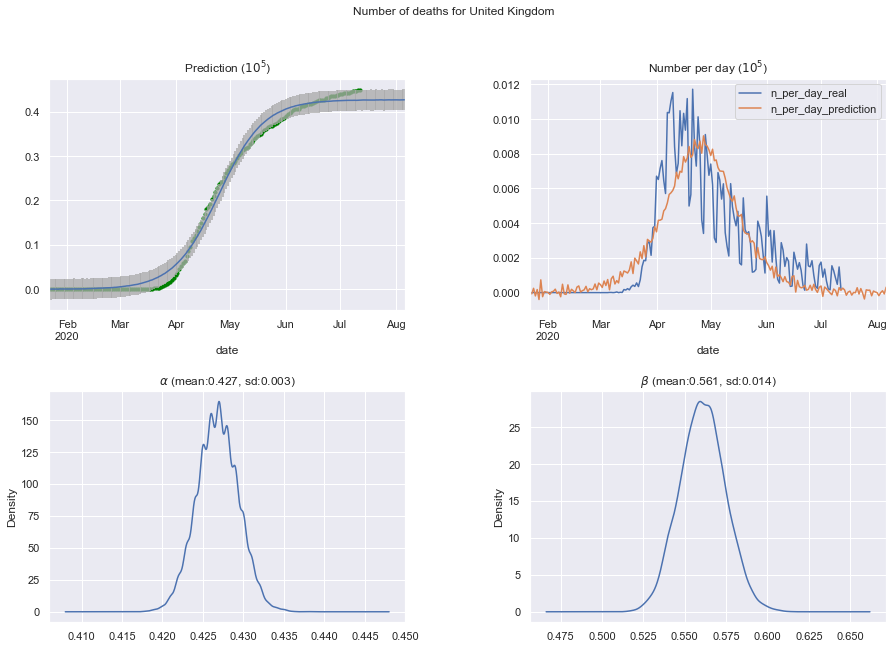


Sweden:
Time Series size: 173
Model parameters: alpha=0.053 (sd:0.0), beta=0.471(sd:0.01),    t0=14.73(sd:0.064)


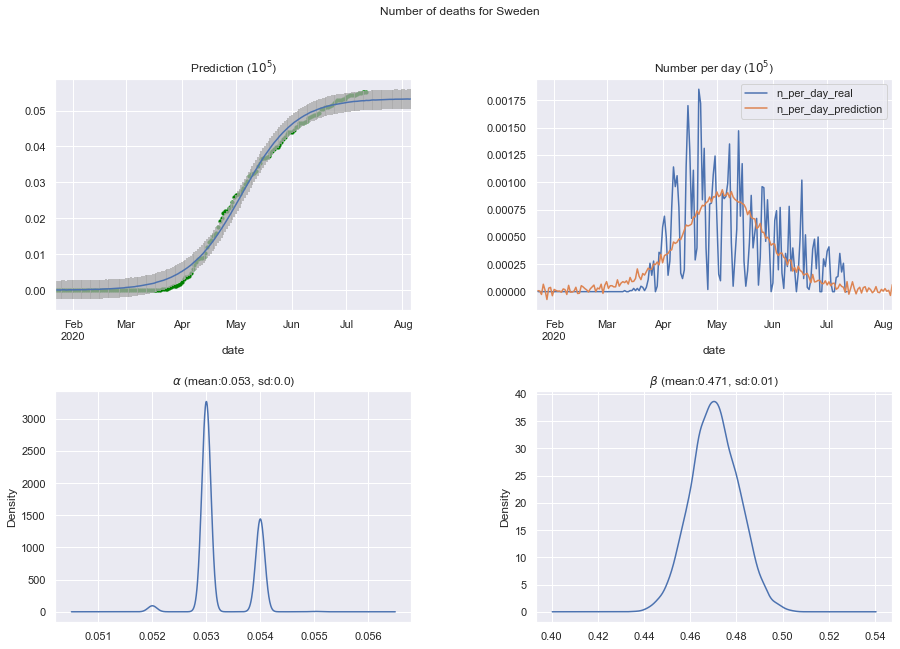

In [7]:
print ('\nNumber of cases for regions:')
get_regions_prediction(df,region_list,target_field='deaths')

In [8]:
def group_by_country(country):
    test_data= pd.read_csv('data/train.csv')
    df = test_data[test_data['Country_Region'] == country]
    return df

In [9]:
df = group_by_country('Portugal')

In [10]:
df['ConfirmedCases'] = df['ConfirmedCases'].diff()
df['Fatalities'] = df['Fatalities'].diff()
df = df.fillna(0)
df = df[df['ConfirmedCases'] != 0]

In [11]:
del df['Unnamed: 0'] 
del df['Country_Region']

In [12]:
df

,Date,ConfirmedCases,Fatalities
7575,2020-03-02,2.0,0.0
7947,2020-03-04,3.0,0.0
8133,2020-03-05,3.0,0.0
8319,2020-03-06,5.0,0.0
8505,2020-03-07,7.0,0.0
...,...,...,...
31383,2020-07-08,443.0,2.0
31569,2020-07-09,418.0,13.0
31755,2020-07-10,402.0,2.0
31941,2020-07-11,542.0,8.0


In [13]:
data = df['ConfirmedCases'].values

(array([ 5., 16., 52., 26., 17.,  9.,  2.,  1.,  0.,  1.]),
 array([-161. ,    6.7,  174.4,  342.1,  509.8,  677.5,  845.2, 1012.9,
        1180.6, 1348.3, 1516. ]),
 <a list of 10 Patch objects>)

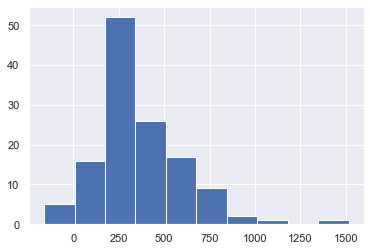

In [14]:
plt.hist(data)